In [11]:
%pip install lmfit
%pip install xlrd
%pip install pybroom
%pip install openpyxl

In [12]:
%pip install -q ipympl

In [13]:
import scipy
import matplotlib.pyplot as plt
import lmfit
import io
import numpy as np
import pandas as pd
import io
import pybroom as pb
from IPython.display import clear_output

In [14]:
%matplotlib inline

# Read rheology data

These are data for a carbopol sample

In [15]:
data_string='''Step time	Temperature	Stress	Shear rate	Viscosity	Normal stress coefficient	Gap	Normal force	Normal stress	Time	Torque	Velocity
s	°C	Pa	1/s	Pa.s	Pa.s²	µm	N	Pa	s	µN.m	rad/s
82.0817	23.01	815	100.012	8.15175	-0.0993043	40.3444	-0.624097	-993	82.0817	13660.0	3.50042
157.150	22.99	725	79.4423	9.13092	-0.169847	40.3881	-0.673505	-1070	157.150	12153.9	2.78048
232.217	23.00	647	63.1033	10.2478	-0.285946	40.3313	-0.715430	-1140	232.217	10835.0	2.20862
307.286	23.00	588	50.1247	11.7340	-0.469807	40.3415	-0.741657	-1180	307.286	9854.75	1.75437
382.352	22.99	529	39.8155	13.2884	-0.770535	40.3805	-0.767496	-1220	382.352	8864.87	1.39354
457.421	23.00	480	31.6266	15.1661	-1.22680	40.3706	-0.771006	-1230	457.421	8036.66	1.10693
532.488	23.01	433	25.1219	17.2208	-1.98528	40.3777	-0.787237	-1250	532.488	7248.60	0.879265
607.557	23.00	391	19.9550	19.5898	-3.19407	40.3798	-0.799149	-1270	607.557	6549.84	0.698425
682.624	23.00	354	15.8508	22.3528	-5.16151	40.3583	-0.814818	-1300	682.624	5936.52	0.554779
757.692	23.01	321	12.5908	25.5251	-8.21461	40.3445	-0.818221	-1300	757.692	5384.79	0.440677
832.759	23.00	292	10.0012	29.2159	-13.1290	40.3734	-0.825118	-1310	832.759	4895.76	0.350042
907.828	23.00	266	7.94424	33.5023	-20.6821	40.3820	-0.820123	-1310	907.828	4459.38	0.278048
982.895	23.00	244	6.31033	38.5920	-32.9086	40.3632	-0.823367	-1310	982.895	4080.36	0.220862
1057.96	23.00	223	5.01247	44.5532	-52.9462	40.3828	-0.835831	-1330	1057.96	3741.79	0.175437
1133.03	22.99	205	3.98155	51.4661	-83.5454	40.3759	-0.832160	-1320	1133.03	3433.38	0.139354
1208.10	23.00	188	3.16266	59.5419	-132.410	40.3453	-0.832157	-1320	1208.10	3155.17	0.110693
1283.17	23.01	174	2.51220	69.3490	-213.941	40.3441	-0.848367	-1350	1283.17	2919.07	0.0879272
1358.24	23.00	161	1.99551	80.6573	-336.674	40.3369	-0.842364	-1340	1358.24	2696.79	0.0698430
1433.31	22.99	150	1.58509	94.3462	-540.578	40.3373	-0.853390	-1360	1433.31	2505.69	0.0554783
1508.38	23.00	139	1.25908	110.678	-863.284	40.3466	-0.859891	-1370	1508.38	2334.88	0.0440680
1583.45	22.99	130	1.00013	129.872	-1387.48	40.3093	-0.871997	-1390	1583.45	2176.31	0.0350044
1658.52	23.00	121	0.794429	152.717	-2177.84	40.3482	-0.863607	-1370	1658.52	2032.78	0.0278050
1733.59	23.00	114	0.631037	180.205	-3475.60	40.3528	-0.869600	-1380	1733.59	1905.33	0.0220863
1808.66	23.00	107	0.501251	213.104	-5569.38	40.3654	-0.879219	-1400	1808.66	1789.76	0.0175438
1883.73	23.00	101	0.398158	252.437	-8857.36	40.3394	-0.882254	-1400	1883.73	1684.06	0.0139355
1958.81	23.01	94.7	0.316268	299.484	-14125.2	40.3620	-0.887738	-1410	1958.81	1587.00	0.0110694
2033.88	23.01	89.3	0.251221	355.648	-22562.6	40.3236	-0.894705	-1420	2033.88	1497.01	8.79272e-3
2108.95	23.00	84.4	0.199552	422.818	-36276.0	40.3465	-0.907630	-1440	2108.95	1413.70	6.98430e-3
2184.02	23.00	79.8	0.158509	503.231	-57756.7	40.3440	-0.911784	-1450	2184.02	1336.51	5.54783e-3
2259.09	23.00	75.4	0.125909	598.990	-93765.0	40.3387	-0.933967	-1490	2259.09	1263.64	4.40680e-3
2334.16	23.00	71.3	0.100013	712.707	-150443	40.3037	-0.945502	-1500	2334.16	1194.30	3.50045e-3
2409.22	23.00	67.3	0.0794429	846.887	-242884	40.3107	-0.963140	-1530	2409.22	1127.27	2.78050e-3
2484.30	23.00	63.3	0.0631038	1003.30	-387750	40.3132	-0.970159	-1540	2484.30	1060.81	2.20863e-3
2559.36	23.00	59.3	0.0501251	1183.55	-630862	40.3172	-0.995920	-1590	2559.36	994.010	1.75438e-3
2634.43	23.00	55.5	0.0398158	1393.93	-1014790	40.3104	-1.01081	-1610	2634.43	929.916	1.39355e-3
2709.50	23.00	52.1	0.0316268	1648.84	-1641070	40.3172	-1.03137	-1640	2709.50	873.742	1.10694e-3
2784.57	23.00	49.3	0.0251221	1963.85	-2599120	40.3201	-1.03066	-1640	2784.57	826.631	8.79272e-4
2859.64	23.00	47.0	0.0199552	2353.74	-4214290	40.3192	-1.05442	-1680	2859.64	786.977	6.98431e-4
2934.71	22.99	45.0	0.0158510	2836.78	-6701930	40.3126	-1.05801	-1680	2934.71	753.406	5.54784e-4
3009.78	23.00	43.3	0.0125908	3435.96	-1.07947e7	40.3287	-1.07522	-1710	3009.78	724.856	4.40679e-4
3084.85	23.01	41.8	0.0100013	4177.15	-1.61363e7	40.3498	-1.01413	-1610	3084.85	699.978	3.50045e-4
3159.92	23.01	40.6	7.94428e-3	5111.52	-2.61299e7	40.3610	-1.03616	-1650	3159.92	680.382	2.78050e-4
3234.99	23.00	39.6	6.31041e-3	6271.18	-4.03339e7	40.3537	-1.00917	-1610	3234.99	663.064	2.20864e-4
3310.06	23.00	38.7	5.01251e-3	7728.98	-6.37680e7	40.3710	-1.00668	-1600	3310.06	649.121	1.75438e-4
3385.13	23.00	38.0	3.98161e-3	9544.09	-9.59826e7	40.3739	-0.956070	-1520	3385.13	636.710	1.39356e-4
3460.20	23.00	37.2	3.16271e-3	11766.2	-1.45321e8	40.3698	-0.913328	-1450	3460.20	623.510	1.10695e-4
3535.27	22.99	36.9	2.51218e-3	14692.6	-2.63972e8	40.4058	-1.04674	-1670	3535.27	618.439	8.79264e-5
3610.34	22.99	36.6	1.99552e-3	18324.1	-4.34609e8	40.3874	-1.08740	-1730	3610.34	612.670	6.98432e-5
3685.41	23.00	36.3	1.58508e-3	22929.8	-7.00900e8	40.3736	-1.10646	-1760	3685.41	608.976	5.54777e-5
3760.48	22.99	36.2	1.25908e-3	28737.8	-1.22225e9	40.3966	-1.21744	-1940	3760.48	606.256	4.40679e-5
3835.55	23.00	36.2	1.00013e-3	36154.0	-1.83971e9	40.3682	-1.15622	-1840	3835.55	605.844	3.50045e-5'''

In [16]:
data=pd.read_csv(io.StringIO(data_string), delimiter='\t', skiprows=[1])
data.head()

,Step time,Temperature,Stress,Shear rate,Viscosity,Normal stress coefficient,Gap,Normal force,Normal stress,Time,Torque,Velocity
0,82.0817,23.01,815.0,100.0120,8.15175,-0.099304,40.3444,-0.624097,-993,82.0817,13660.00,3.50042
1,157.1500,22.99,725.0,79.4423,9.13092,-0.169847,40.3881,-0.673505,-1070,157.1500,12153.90,2.78048
2,232.2170,23.00,647.0,63.1033,10.24780,-0.285946,40.3313,-0.715430,-1140,232.2170,10835.00,2.20862
3,307.2860,23.00,588.0,50.1247,11.73400,-0.469807,40.3415,-0.741657,-1180,307.2860,9854.75,1.75437
4,382.3520,22.99,529.0,39.8155,13.28840,-0.770535,40.3805,-0.767496,-1220,382.3520,8864.87,1.39354


# define model : Three component model

$$\sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma$$

In [17]:
def TC(x, ystress=1.0, eta_bg=0.1, gammadot_crit=0.1):
    """Three component model
    Note:
    .. math::
       \sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma
    Args:
        ystress: yield stress [Pa]
        eta_bg : Background viscosity [Pa s]
        gammadot_crit : Critical shear rate [1/s]
    Returns:
        stress : Shear Stress, [Pa]
    """
    return ystress + ystress * (x / gammadot_crit) ** 0.5 + eta_bg * x

TC_model = lmfit.Model(TC, prefix="TC_")

# set parameters for model class
TC_model.set_param_hint("ystress", min=0)
TC_model.set_param_hint("eta_bg", min=0, vary=True)
TC_model.set_param_hint("gammadot_crit", min=0)


def HB(x, ystress=1.0, K=1.0, n=0.5):
    """Hershel-Bulkley Model
    Note:
    .. math::
       \sigma= \sigma_y + K \cdot \dot\gamma^n
    Args:
        ystress: yield stress [Pa]
        K : Consistency index [Pa s^n]
        n : Shear thinning index []
    Returns:
        stress : Shear Stress, [Pa]
    """
    return ystress + K * x ** n


HB_model = lmfit.Model(HB, prefix="HB_")

HB_model.set_param_hint("ystress", min=0)
HB_model.set_param_hint("K", min=0, vary=True)
HB_model.set_param_hint("n", min=0.0, max=1, vary=True)

# TC and HB on all range

name,key,HB_K,HB_n,HB_ystress,TC_eta_bg,TC_gammadot_crit,TC_ystress
0,HB_example,101.699799,0.428222,29.286998,NaN,NaN,NaN
1,TC_example,NaN,NaN,NaN,6.013255e-09,0.174486,35.366821


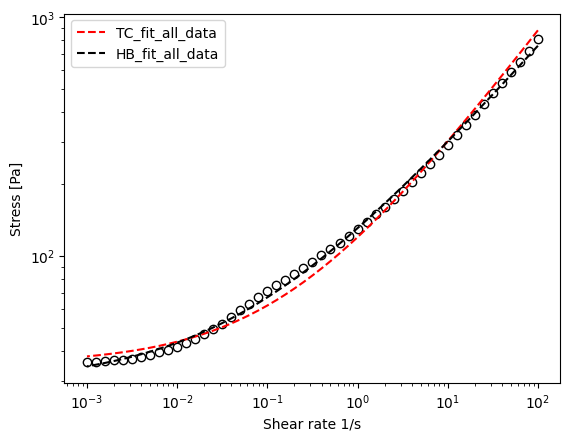

In [18]:
res_fit_TC=TC_model.fit(data['Stress'],x=data['Shear rate'], weights=1/data['Stress'])
res_fit_HB=HB_model.fit(data['Stress'],x=data['Shear rate'], weights=1/data['Stress'])

plt.plot(data['Shear rate'], data['Stress'], 'o', mfc='none', color='black')
plt.xlabel('Shear rate 1/s')
plt.ylabel('Stress [Pa]')
plt.xscale('log')
plt.yscale('log')

plt.plot(data['Shear rate'],res_fit_TC.best_fit, label='TC_fit_all_data', linestyle='--', color='red')
plt.plot(data['Shear rate'],res_fit_HB.best_fit, label='HB_fit_all_data', linestyle='--', color='black')
plt.legend()

tidy_long=pb.tidy({'TC_example':res_fit_TC, 'HB_example':res_fit_HB})
tidy_wide=tidy_long.pivot(index='key',columns='name',values='value')
tidy_wide.reset_index()

# TC and HB on shear rate above 0.1

name,key,HB_K,HB_n,HB_ystress,TC_eta_bg,TC_gammadot_crit,TC_ystress
0,HB_example,82.657992,0.47937,45.965762,NaN,NaN,NaN
1,TC_example,NaN,NaN,NaN,2.679257e-11,0.434232,50.541145


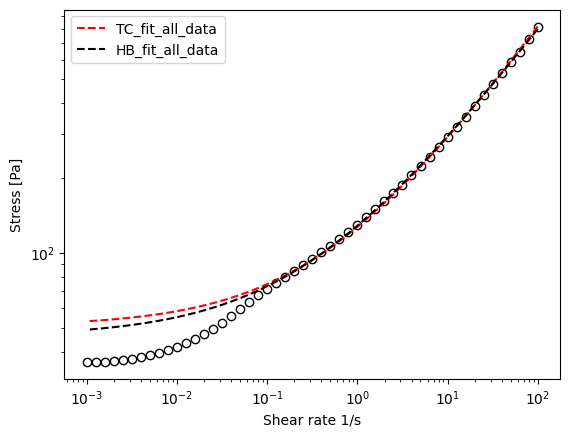

In [19]:
condition=data['Shear rate']>0.1

res_fit_TC=TC_model.fit(data['Stress'],x=data['Shear rate'], weights=condition/data['Stress'])
res_fit_HB=HB_model.fit(data['Stress'],x=data['Shear rate'], weights=condition/data['Stress'])

plt.plot(data['Shear rate'], data['Stress'], 'o', mfc='none', color='black')
plt.xlabel('Shear rate 1/s')
plt.ylabel('Stress [Pa]')
plt.xscale('log')
plt.yscale('log')

plt.plot(data['Shear rate'],res_fit_TC.best_fit, label='TC_fit_all_data', linestyle='--', color='red')
plt.plot(data['Shear rate'],res_fit_HB.best_fit, label='HB_fit_all_data', linestyle='--', color='black')
plt.legend()

tidy_long=pb.tidy({'TC_example':res_fit_TC, 'HB_example':res_fit_HB})
tidy_wide=tidy_long.pivot(index='key',columns='name',values='value')
tidy_wide.reset_index()

# TC and HB on shear rate above 0.1 (iterative approach to only fit data above critical shear rate)

min shear rate used: 0.631037, critical shear rate: 0.5338896218483227


name,key,TC_eta_bg,TC_gammadot_crit,TC_ystress
0,TC_example,1.963985e-12,0.53389,54.886017


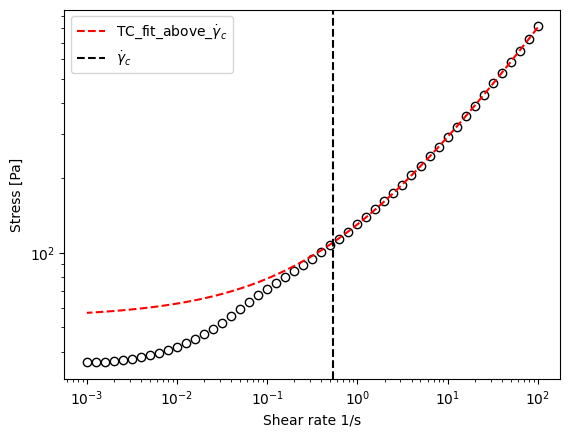

In [20]:
condition=data['Shear rate']>0

for index, _ in enumerate(condition):
    clear_output(wait=True)
    condition.iloc[-index]=False
    res_fit_TC=TC_model.fit(data['Stress'],x=data['Shear rate'], weights=condition)
    min_shear_rate=min(data['Shear rate'][condition])
    gamma_dot_crit=res_fit_TC.best_values['TC_gammadot_crit']
    print(f'min shear rate used: {min_shear_rate}, critical shear rate: {gamma_dot_crit}')
    if min_shear_rate>gamma_dot_crit:
        break
    
           
plt.plot(data['Shear rate'], data['Stress'], 'o', mfc='none', color='black')
plt.xlabel('Shear rate 1/s')
plt.ylabel('Stress [Pa]')
plt.xscale('log')
plt.yscale('log')

plt.plot(data['Shear rate'],res_fit_TC.best_fit, label='TC_fit_above_$\dot\gamma_{c}$', linestyle='--', color='red')
plt.axvline(gamma_dot_crit, linestyle='--', color='black', label='$\dot\gamma_{c}$')
plt.legend()

tidy_long=pb.tidy({'TC_example':res_fit_TC})
tidy_wide=tidy_long.pivot(index='key',columns='name',values='value')
tidy_wide.reset_index()
